In [5]:
%run "! DEFAULT PLOT THINGIES.ipynb"
%run "../! DEFAULT PLOT THINGIES.ipynb"

npix = float(200*200)

ERROR: File `u'! DEFAULT PLOT THINGIES.ipynb.py'` not found.


<IPython.core.display.Javascript object>

`%matplotlib` prevents importing * from pylab and numpy


Current working directory is now c:\users\deen\dropbox\phd rearrangements\thesis\notebooks\biax-CDFS-gammadot-3e-5
Populating the interactive namespace from numpy and matplotlib


In [8]:
def loaddata(path):
    fitdata = np.load(path + "biax-ACF-ACT-fit.npy")
    print fitdata.shape  # 

    vardtdata = {i: np.loadtxt(path + "dt%05i.txt" % i)[1:] for i in range(1,21)}
    minlength = min(len(x) for x in vardtdata.values())

    dts = np.arange(0,21)
    ts = np.arange(0,minlength)

    vardtdata = np.concatenate([[np.array([0]*minlength)]] + [[x[:minlength]] for x in vardtdata.values()])
    print vardtdata.shape, dts.shape, ts.shape
    return ts,dts,fitdata, vardtdata

In [9]:
import json
metingen = json.load(open("u:/biax_metingen_shear.json"))
metingen = [m for m in metingen if "u:/20150907" in m["path"]]

for meting in metingen:
    base,name = os.path.split(meting['path'])
    ts,dts,fitdata,vardtdata = loaddata(base + "/vardt/" + name + "/")
    meting["fitdata"] = fitdata
    meting["vardtdata"] = vardtdata
    
# ts en dts zijn overal hetzelfde

(12836, 3)
(21, 13315) (21,) (13315,)
(12836, 3)
(21, 13315) (21,) (13315,)
(12836, 3)
(21, 13315) (21,) (13315,)
(13313, 3)
(21, 13312) (21,) (13312,)
(13316, 3)
(21, 13315) (21,) (13315,)
(13316, 3)
(21, 13315) (21,) (13315,)
(13316, 3)
(21, 13315) (21,) (13315,)
(13316, 3)
(21, 13315) (21,) (13315,)
(13316, 3)
(21, 13315) (21,) (13315,)


In [10]:
metingen = sorted(metingen, key=lambda x: x["phi"])

([], <a list of 0 Text yticklabel objects>)

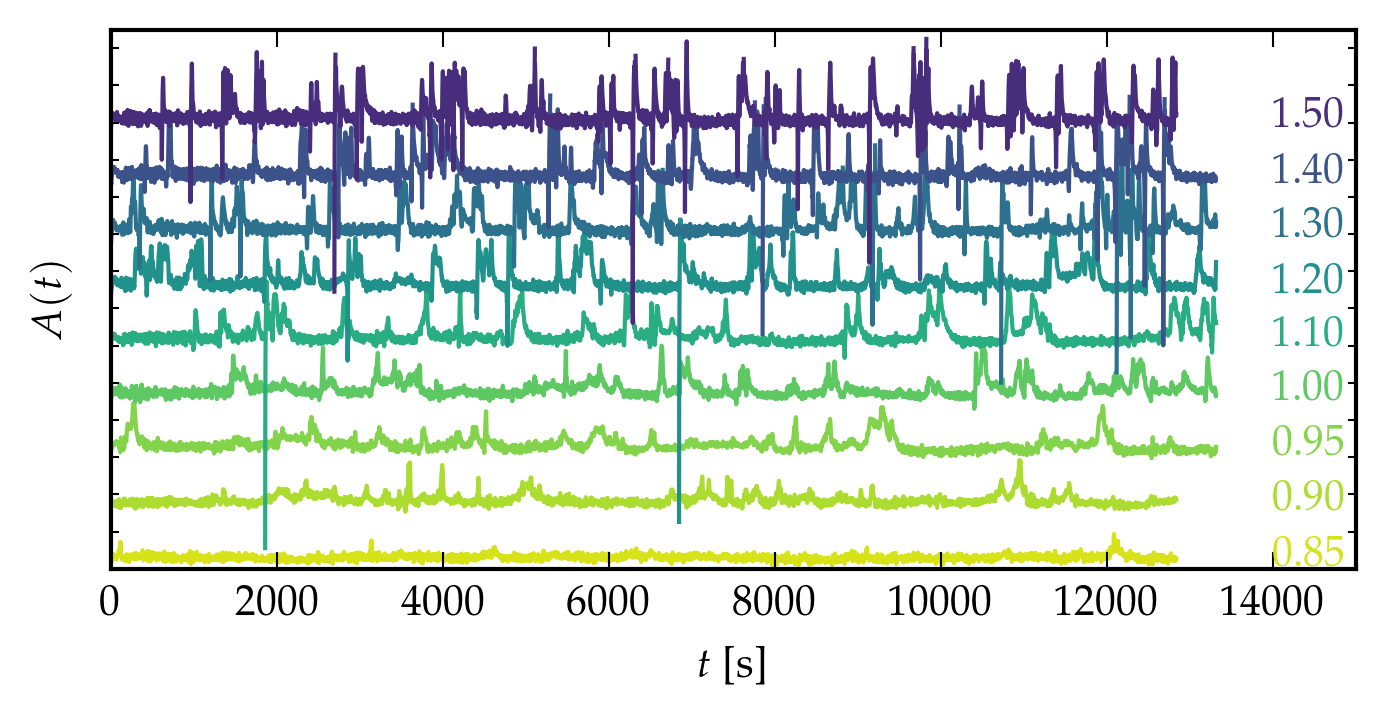

In [11]:
fullfig()

for i,meting in enumerate(sorted(metingen, key=lambda x: x['phi'])):
    factor = 1000**i
    phi = meting["phi"] 
    color = phi_cmap(phi_norm(phi))
    plt.plot(factor*meting["fitdata"][:,0], color=color)
    plt.text(14000, np.median(meting["fitdata"][:,0]) * factor, "%.2f" % meting["phi"], color=color, va='center')

plt.axis(xmin=0, xmax=15000)
plt.semilogy()
plt.xlabel(r"$t$ [s]")
plt.ylabel(r"$A(t)$")
plt.yticks([])

#plt.savefig('A-vs-t.pdf')

\includegraphics{notebooks/biax-CDFS-gammadot-3e-5/cdfs.pdf}


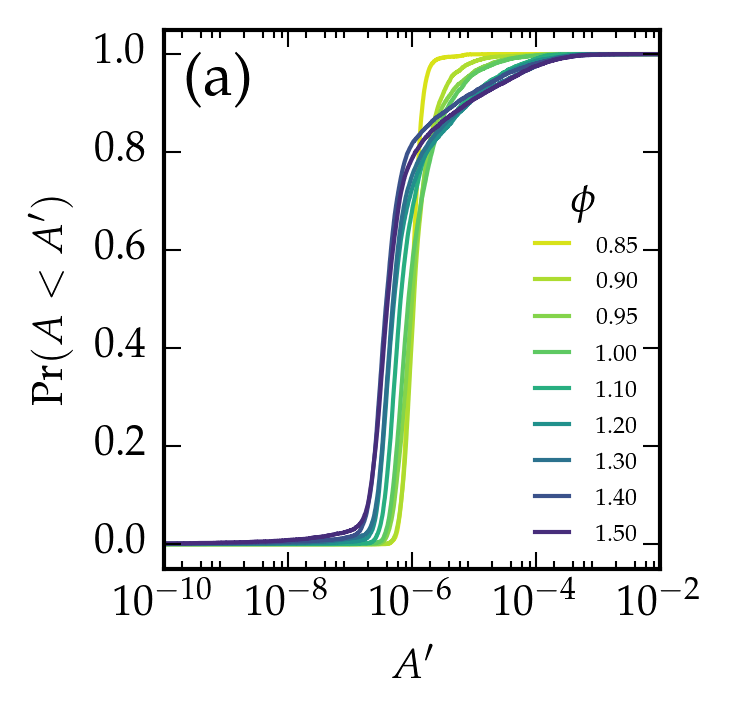

In [12]:
# nu cdfjes :P
import cdf

halffig()

for i,meting in enumerate(metingen):
    A = meting["fitdata"][:,0]/npix
    phi = meting["phi"] 
    color = phi_cmap(phi_norm(phi))
    x,y = cdf.get_cdf_data(A, lower=1e-11, upper=1e-1)
    plt.plot(x,y, color=color, label="%.2f" % phi)
    
plt.semilogx()
plt.axis(xmin=1e-10, xmax=1e-2)
plt.xlabel(r"$A'$")
plt.ylabel(r"$\Pr(A < A')$")
plt.xticks([1e-10,1e-8,1e-6,1e-4,1e-2])
plt.axis(ymin=-0.05, ymax=1.05)

plt.legend(loc='lower right', fontsize='xx-small', frameon=False, title=r"$\phi$")
subplotlabel('(a)')
plt.savefig('cdfs.pdf')

\includegraphics{notebooks/biax-CDFS-gammadot-3e-5/PDF.pdf}


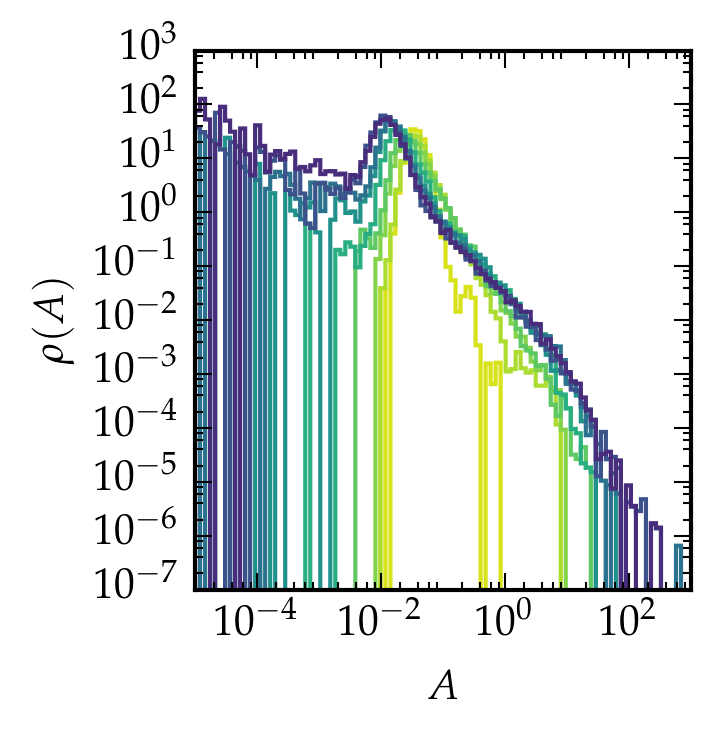

In [14]:
# nu cdfjes :P
import cdf

halffig()

bins = np.logspace(-5,3,100)

for i,meting in enumerate(metingen):
    A = meting["fitdata"][:,0]
    phi = meting["phi"] 
    color = phi_cmap(phi_norm(phi))

    plt.hist(A, bins=bins, histtype='step', color=color, label="%.2f" % phi, log=True, normed=True, bottom =1e-8)
    
plt.semilogx()
plt.xlabel(r"$A$")
plt.ylabel(r"$\rho(A)$")
plt.xticks([1e-4,1e-2,1e0,1e2])
plt.semilogy()

#plt.legend(loc='lower right', fontsize='xx-small', frameon=False, title=r"$\phi$")#
plt.savefig('PDF.pdf')

0.849988255268 1.00275507702e-06 1.73881437562e-06
0.899991567378 1.094323605e-06 4.27618396768e-06
0.949988481982 1.01958450586e-06 7.44169683262e-06
0.999985403557 8.93467769176e-07 8.52549982767e-06
1.09998983453 6.67931240368e-07 2.29642709984e-05
1.19997904182 5.27331667002e-07 2.58278411118e-05
1.29997854075 5.06451694844e-07 4.0198108187e-05
1.39997648137 3.9618232709e-07 2.91580236359e-05
1.49998079998 4.15508433846e-07 4.47770108661e-05
\includegraphics{notebooks/biax-CDFS-gammadot-3e-5/percentiles-alt.pdf}


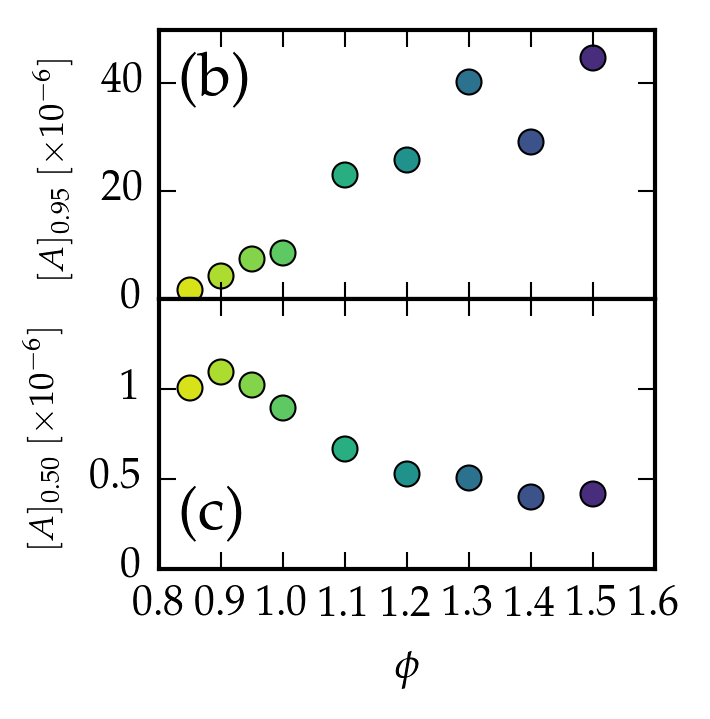

In [16]:
# nu percentiles

import cdf

halffig()
ax1 = plt.subplot(2,1,1)
ax2 = plt.subplot(2,1,2)
plt.subplots_adjust(hspace=0)

bins = np.logspace(-5,3,100)

for i,meting in enumerate(metingen):
    A = meting["fitdata"][:,0] / npix
    phi = meting["phi"] 
    color = phi_cmap(phi_norm(phi))
    
    low,med,high = np.percentile(A, [5,50,95])
    
    #plt.plot(phi, low, "x", color=color)
    print phi, med, high
    ax2.plot(phi, med, "o", color=color)
    ax1.plot(phi, high, "o", color=color)

#plt.text(1.54, low/2, r"5\%", va='center', ha='right', fontsize='x-small')
#plt.text(1.58, med*1.5, r"median", va='center', ha='right', fontsize='x-small')
#plt.text(1.56, high*2, r"95\%", va='center', ha='right', fontsize='x-small')

for ax in [ax1, ax2]:
    ax.axis(xmin=0.8, xmax=1.6)
    
ax1.set_ylim(0,50e-6)
ax1.set_yticks([0,20e-6,40e-6])
ax1.set_yticklabels([0,20,40])

ax2.set_ylim(0,1.5e-6)
ax2.set_yticks([0,.5e-6,1e-6])
ax2.set_yticklabels([0,0.5,1])

ax1.set_xticklabels([])
    
ax2.set_xlabel(r"$\phi$")
ax1.set_ylabel(r"$[A]_{0.95}~[\times 10^{-6}]$", fontsize='small')
ax2.set_ylabel(r"$[A]_{0.50}~[\times 10^{-6}]$", fontsize='small')

subplotlabel('(b)', ax=ax1)
subplotlabel('(c)', ax=ax2, loc='lower left')

plt.savefig('percentiles-alt.pdf')

In [ ]:
# nu percentiles

import cdf
import scipy.stats

halffig()

bins = np.logspace(-5,3,100)

for i,meting in enumerate(metingen):
    A = meting["fitdata"][:,0]
    A = A[isfinite(A)]
    phi = meting["phi"] 
    color = phi_cmap(phi_norm(phi))
    
    plt.plot(phi, np.mean(A), "x", color=color)
    plt.plot(phi, np.std(A), "+", color=color)
    #low,med,high = np.percentile(B, [5,50,95])
    
plt.axis(xmin=0.8, xmax=1.6)
plt.semilogy()
plt.xlabel(r"$\phi$")
plt.ylabel(r"std/avg")

plt.savefig('std-avg-A.pdf')

\includegraphics{notebooks/biax-CDFS-gammadot-3e-5/cdfs-beta.pdf}


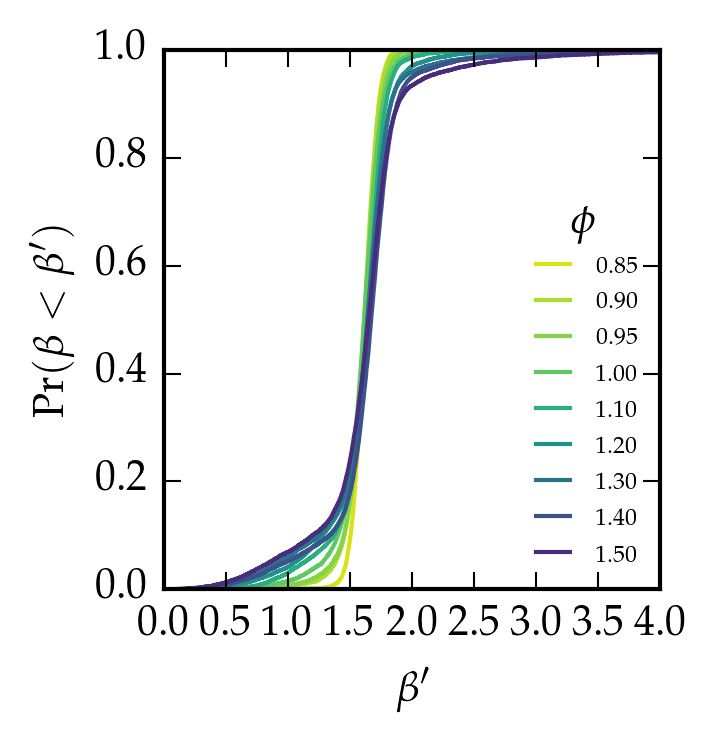

In [17]:
# nu beta
import cdf

halffig()

for i,meting in enumerate(metingen):
    A = meting["fitdata"][:,1]
    phi = meting["phi"] 
    color = phi_cmap(phi_norm(phi))

    x,y = cdf.get_cdf_data(A, lower=0, upper=4)
    plt.plot(x,y, color=color, label="%.2f" % phi)
    
plt.axis(xmin=0, xmax=4)
plt.xlabel(r"$\beta'$")
plt.ylabel(r"$\Pr(\beta < \beta')$")
#plt.xticks([1e-4,1e-2,1e0,1e2])
#plt.axis(ymin=-0.05, ymax=1.05)

plt.legend(loc='lower right', fontsize='xx-small', frameon=False, title=r"$\phi$")

plt.savefig('cdfs-beta.pdf')

\includegraphics{notebooks/biax-CDFS-gammadot-3e-5/PDF-beta.pdf}


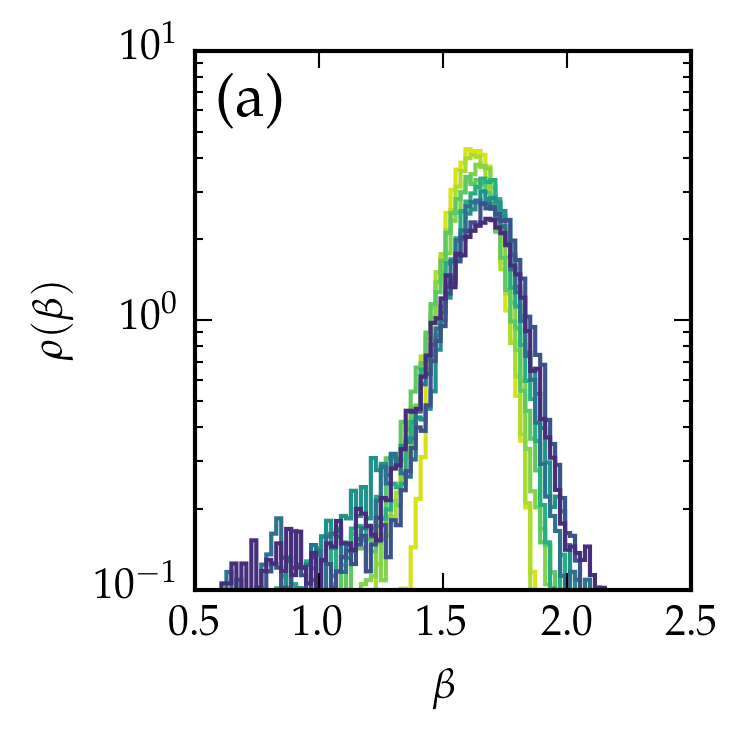

In [18]:
# nu cdfjes :P
import cdf

halffig()

bins = np.linspace(-1,4,250)

for i,meting in enumerate(metingen):
    B = meting["fitdata"][:,1]
    phi = meting["phi"] 
    color = phi_cmap(phi_norm(phi))


    plt.hist(B, bins=bins, histtype='step', color=color, label="%.2f" % phi, normed=True, log=True,bottom =1e-8)

plt.axis(ymin=1e-3)
#plt.semilogx()
plt.xlabel(r"$\beta$")
plt.ylabel(r"$\rho(\beta)$")
plt.axis(xmin=0.5, xmax=2.5, ymin=1e-1)
#plt.xticks([1e-4,1e-2,1e0,1e2])
#plt.semilogy()

#plt.legend(loc='lower right', fontsize='xx-small', frameon=False, title=r"$\phi$")#
subplotlabel('(a)')
plt.savefig('PDF-beta.pdf')

\includegraphics{notebooks/biax-CDFS-gammadot-3e-5/beta-mean-std-alt.pdf}


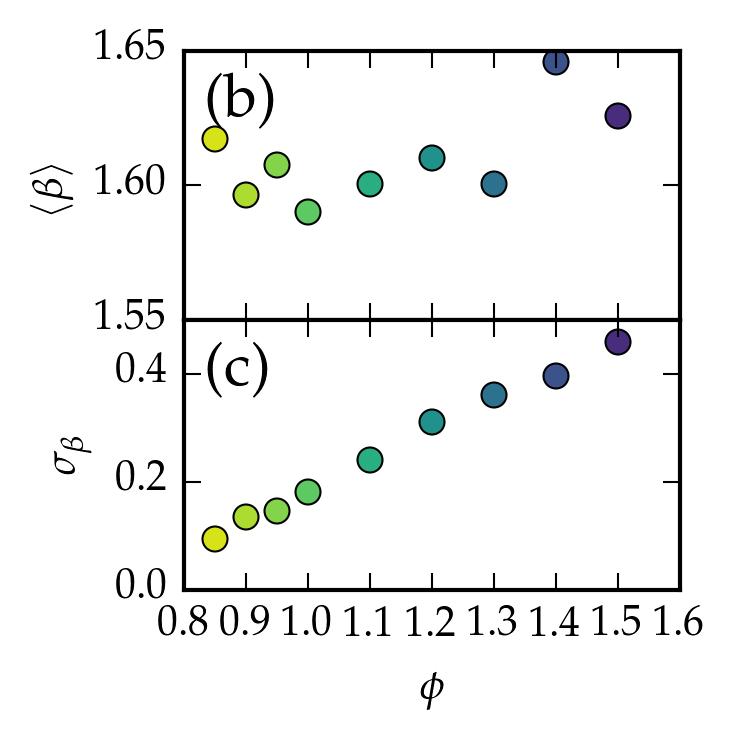

In [19]:
# nu percentiles

import cdf

halffig()
ax1 = plt.subplot(2,1,1)
ax2 = plt.subplot(2,1,2)
plt.subplots_adjust(hspace=0)

bins = np.logspace(-5,3,100)

for i,meting in enumerate(metingen):
    B = meting["fitdata"][:,1]
    B = B[isfinite(B)]
    phi = meting["phi"] 
    color = phi_cmap(phi_norm(phi))

    
    ax1.plot(phi, np.mean(B), "o", color=color)
    ax2.plot(phi, np.std(B), "o", color=color)


for ax in [ax1, ax2]:
    ax.axis(xmin=0.8, xmax=1.6)
    
ax1.set_ylim(1.55,1.65)
ax1.set_yticks([1.55,1.6,1.65])

ax2.set_ylim(0,0.5)
ax2.set_yticks([0,0.2,0.4])


ax1.set_xticklabels([])
    
ax2.set_xlabel(r"$\phi$")
ax1.set_ylabel(r"$\langle \beta \rangle$")
ax2.set_ylabel(r"$\sigma_\beta$")

subplotlabel('(b)', ax=ax1)
subplotlabel('(c)', ax=ax2, loc='upper left')

plt.savefig('beta-mean-std-alt.pdf')